<a href="https://colab.research.google.com/github/hugoce79/portafolio/blob/main/Ecobici/data_load_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conexión con Google Drive:

In [ ]:
# # Importar la biblioteca necesaria para montar Google Drive en Google Colab:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# Carga de Librerias:

In [ ]:
# Importar la biblioteca Pandas y se abrevia como 'pd'
import pandas as pd
# Importar la biblioteca NumPy y se abrevia como 'np'
import numpy as np
# Configurar Pandas para mostrar todas las columnas de un DataFrame en la salida
pd.set_option('display.max_columns', None)
# Importar la biblioteca Seaborns para visualización de graficos y se abrevia como sns:
import seaborn as sns
# estilo de salida de las gráficas
sns.set_style("darkgrid")
# importando el módulo datetime para trabajar con fechas y horas en Python
from datetime import datetime

# Carga de Datos:

In [ ]:
# Cargar el archivo CSV
df_ene_21 = pd.read_csv('/content/drive/MyDrive/2021-01.csv')

In [ ]:
# Visualización de los primeros 5 registros del Datarame:
df_ene_21.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,32.0,7608.0,18.0,01/01/2021,07:05:04,143,01/01/2021,07:13:25
1,M,24.0,8324.0,76.0,01/01/2021,09:03:35,76,01/01/2021,09:08:08
2,F,35.0,6787.0,281.0,01/01/2021,09:22:41,61,01/01/2021,09:50:03
3,F,34.0,11875.0,405.0,01/01/2021,10:21:21,431,01/01/2021,10:27:16
4,M,26.0,8164.0,30.0,01/01/2021,11:52:38,126,01/01/2021,12:07:30


In [ ]:
# Para ver la dimensión del DataFrame:
df_ene_21.shape

(255805, 9)

In [ ]:
# Cargar el archivo CSV
estaciones = pd.read_csv('/content/drive/MyDrive/estaciones_ecobici_sist_anterior.csv')

In [ ]:
estaciones.head()

,sistema,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud,tipo_ce,candados
0,ECOBICI,1,Río Sena - Río Balsas,Río Sena,Río Balsas,Cuauhtémoc,CUAUHTEMOC,19.433590,-99.167819,4G,27
1,ECOBICI,2,Río Guadalquivir - Río Nazas,Río Guadalquivir,Río Nazas,Cuauhtémoc,CUAUHTEMOC,19.430510,-99.171201,3G,21
2,ECOBICI,3,Reforma - Insurgentes,Reforma,Insurgentes,Tabacalera,CUAUHTEMOC,19.431630,-99.158547,4G,36
3,ECOBICI,4,Río Nilo - Río Pánuco,Río Nilo,Río Pánuco,Cuauhtémoc,CUAUHTEMOC,19.428491,-99.171693,3G,15
4,ECOBICI,5,Río Pánuco - Río Tíber,Río Pánuco,Río Tíber,Cuauhtémoc,CUAUHTEMOC,19.429804,-99.169451,3G,12


In [ ]:
estaciones.shape

(480, 11)

In [ ]:
# Creamos una Lista del nombre de las columnas a eliminar:
columnas_eliminar = ['sistema','tipo_ce','candados']

In [ ]:
# Eliminar las columnas:
estaciones = estaciones.drop(columnas_eliminar, axis=1)

In [ ]:
estaciones.head()

,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud
0,1,Río Sena - Río Balsas,Río Sena,Río Balsas,Cuauhtémoc,CUAUHTEMOC,19.433590,-99.167819
1,2,Río Guadalquivir - Río Nazas,Río Guadalquivir,Río Nazas,Cuauhtémoc,CUAUHTEMOC,19.430510,-99.171201
2,3,Reforma - Insurgentes,Reforma,Insurgentes,Tabacalera,CUAUHTEMOC,19.431630,-99.158547
3,4,Río Nilo - Río Pánuco,Río Nilo,Río Pánuco,Cuauhtémoc,CUAUHTEMOC,19.428491,-99.171693
4,5,Río Pánuco - Río Tíber,Río Pánuco,Río Tíber,Cuauhtémoc,CUAUHTEMOC,19.429804,-99.169451


# Procesamiento de los Datos:

Con esta operación, ahora tienes una nueva columna llamada 'num_cicloestacion' en el DataFrame df_ene_21, que contiene los mismos valores que la columna 'Ciclo_Estacion_Retiro':

In [ ]:
df_ene_21['num_cicloestacion'] = df_ene_21['Ciclo_Estacion_Retiro'].copy()

In [ ]:
# Con el método rename() renombramos las columnas:
df_ene_21 = df_ene_21.rename(columns={'Bici':'Id_Bici','Ciclo_Estacion_Retiro':'Ciclo_Estacion_Inicio', 'Fecha_Retiro':'Fecha_Inicio', 'Hora_Retiro':'Hora_Inicio', 'Ciclo_Estacion_Arribo': 'Ciclo_Estacion_Final',
                                      'Fecha_Arribo':'Fecha_Final','Hora_Arribo':'Hora_Final'})

In [ ]:
# Visualizamos los primeros 5 registros del Dataframe:
df_ene_21.head()

,Genero_Usuario,Edad_Usuario,Id_Bici,Ciclo_Estacion_Inicio,Fecha_Inicio,Hora_Inicio,Ciclo_Estacion_Final,Fecha_Final,Hora_Final,num_cicloestacion
0,M,32.0,7608.0,18.0,01/01/2021,07:05:04,143,01/01/2021,07:13:25,18.0
1,M,24.0,8324.0,76.0,01/01/2021,09:03:35,76,01/01/2021,09:08:08,76.0
2,F,35.0,6787.0,281.0,01/01/2021,09:22:41,61,01/01/2021,09:50:03,281.0
3,F,34.0,11875.0,405.0,01/01/2021,10:21:21,431,01/01/2021,10:27:16,405.0
4,M,26.0,8164.0,30.0,01/01/2021,11:52:38,126,01/01/2021,12:07:30,30.0


In [ ]:
# Utilizamos el método copy() para crear una copia del Dataframe original:
df_previo = df_ene_21.copy()

Con esta operación, el DataFrame df_union contendrá las filas de df_previo, con las columnas adicionales de estaciones que coincidan con los valores de la columna 'num_cicloestacion'. Si no hay coincidencias entre df_previo y estaciones, las columnas adicionales tendrán valores nulos (NaN) en las filas correspondientes:

In [ ]:
df_union = pd.merge(df_previo,estaciones, on='num_cicloestacion', how='left')

In [ ]:
df_union.head()

,Genero_Usuario,Edad_Usuario,Id_Bici,Ciclo_Estacion_Inicio,Fecha_Inicio,Hora_Inicio,Ciclo_Estacion_Final,Fecha_Final,Hora_Final,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud
0,M,32.0,7608.0,18.0,01/01/2021,07:05:04,143,01/01/2021,07:13:25,18.0,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381
1,M,24.0,8324.0,76.0,01/01/2021,09:03:35,76,01/01/2021,09:08:08,76.0,Chilpancingo - Campeche,Chilpancingo,Campeche,Hipódromo,CUAUHTEMOC,19.408689,-99.169938
2,F,35.0,6787.0,281.0,01/01/2021,09:22:41,61,01/01/2021,09:50:03,281.0,Pitágoras - La Morena,Pitágoras,La Morena,Narvarte Poniente,BENITO JUAREZ,19.398532,-99.157308
3,F,34.0,11875.0,405.0,01/01/2021,10:21:21,431,01/01/2021,10:27:16,405.0,División del Norte - Municipio Libre,División del Norte,Municipio Libre,Portales Norte,BENITO JUAREZ,19.370558,-99.156649
4,M,26.0,8164.0,30.0,01/01/2021,11:52:38,126,01/01/2021,12:07:30,30.0,Hamburgo - Génova,Hamburgo,Génova,Juárez,CUAUHTEMOC,19.426384,-99.164255


In [ ]:
# Revisión de datos nulos:
df_union.isnull().sum()

Genero_Usuario           28744
Edad_Usuario                 4
Id_Bici                      4
Ciclo_Estacion_Inicio        4
Fecha_Inicio                 4
Hora_Inicio                  4
Ciclo_Estacion_Final         0
Fecha_Final                  0
Hora_Final                   0
num_cicloestacion            4
nombre                     273
calle_principal            273
calle_secundaria           273
colonia                    273
alcaldia                   273
latitud                    273
longitud                   273
dtype: int64

In [ ]:
# Eliminamos los datos nulos con el método dropna:
df_viajes = df_union.dropna()

In [ ]:
df_viajes.isnull().sum()

Genero_Usuario           0
Edad_Usuario             0
Id_Bici                  0
Ciclo_Estacion_Inicio    0
Fecha_Inicio             0
Hora_Inicio              0
Ciclo_Estacion_Final     0
Fecha_Final              0
Hora_Final               0
num_cicloestacion        0
nombre                   0
calle_principal          0
calle_secundaria         0
colonia                  0
alcaldia                 0
latitud                  0
longitud                 0
dtype: int64

In [ ]:
# Revisamos el tipo de dato de cada columna:
df_viajes.dtypes

Genero_Usuario            object
Edad_Usuario             float64
Id_Bici                  float64
Ciclo_Estacion_Inicio    float64
Fecha_Inicio              object
Hora_Inicio               object
Ciclo_Estacion_Final       int64
Fecha_Final               object
Hora_Final                object
num_cicloestacion        float64
nombre                    object
calle_principal           object
calle_secundaria          object
colonia                   object
alcaldia                  object
latitud                  float64
longitud                 float64
dtype: object

Con esta operación, las columnas 'Ciclo_Estacion_Inicio', 'num_cicloestacion', 'Edad_Usuario' y 'Id_Bici' del DataFrame df_viajes se convertirán a tipo entero, lo que facilita el trabajo con datos numéricos en estas columnas:

In [ ]:
df_viajes['Ciclo_Estacion_Inicio'] = df_viajes['Ciclo_Estacion_Inicio'].astype(int)
df_viajes['num_cicloestacion'] = df_viajes['num_cicloestacion'].astype(int)
df_viajes['Edad_Usuario'] = df_viajes['Edad_Usuario'].astype(int)
df_viajes['Id_Bici'] = df_viajes['Id_Bici'].astype(int)

<ipython-input-22-c4be26ad2417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes['Ciclo_Estacion_Inicio'] = df_viajes['Ciclo_Estacion_Inicio'].astype(int)
<ipython-input-22-c4be26ad2417>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes['num_cicloestacion'] = df_viajes['num_cicloestacion'].astype(int)
<ipython-input-22-c4be26ad2417>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [ ]:
df_viajes.head()

,Genero_Usuario,Edad_Usuario,Id_Bici,Ciclo_Estacion_Inicio,Fecha_Inicio,Hora_Inicio,Ciclo_Estacion_Final,Fecha_Final,Hora_Final,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud
0,M,32,7608,18,01/01/2021,07:05:04,143,01/01/2021,07:13:25,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381
1,M,24,8324,76,01/01/2021,09:03:35,76,01/01/2021,09:08:08,76,Chilpancingo - Campeche,Chilpancingo,Campeche,Hipódromo,CUAUHTEMOC,19.408689,-99.169938
2,F,35,6787,281,01/01/2021,09:22:41,61,01/01/2021,09:50:03,281,Pitágoras - La Morena,Pitágoras,La Morena,Narvarte Poniente,BENITO JUAREZ,19.398532,-99.157308
3,F,34,11875,405,01/01/2021,10:21:21,431,01/01/2021,10:27:16,405,División del Norte - Municipio Libre,División del Norte,Municipio Libre,Portales Norte,BENITO JUAREZ,19.370558,-99.156649
4,M,26,8164,30,01/01/2021,11:52:38,126,01/01/2021,12:07:30,30,Hamburgo - Génova,Hamburgo,Génova,Juárez,CUAUHTEMOC,19.426384,-99.164255


Con esta operación, ahora tienes una nueva columna llamada 'Fecha_Hora_Inicio' en el DataFrame df_viajes, que contiene la fecha y hora de inicio de cada viaje en un solo formato de fecha y hora:

In [ ]:
df_viajes['Fecha_Hora_Inicio'] = df_viajes['Fecha_Inicio'] +" " + df_viajes['Hora_Inicio']

<ipython-input-24-9d8753765cf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes['Fecha_Hora_Inicio'] = df_viajes['Fecha_Inicio'] +" " + df_viajes['Hora_Inicio']


Con esta operación, la columna 'Fecha_Hora_Inicio' del DataFrame df_viajes se convierte de formato de cadena de caracteres a formato de fecha y hora, lo que facilita el trabajo con fechas y cálculos de tiempo:

In [ ]:
df_viajes["Fecha_Hora_Inicio"]= pd.to_datetime(df_viajes["Fecha_Hora_Inicio"], format= "%d/%m/%Y %H:%M:%S")

<ipython-input-25-8da4483685a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes["Fecha_Hora_Inicio"]= pd.to_datetime(df_viajes["Fecha_Hora_Inicio"], format= "%d/%m/%Y %H:%M:%S")


Con esta operación, ahora tienes una nueva columna llamada 'Fecha_Hora_Final' en el DataFrame df_viajes, que contiene la fecha y hora de finalización de cada viaje en formato de fecha y hora:

In [ ]:
df_viajes['Fecha_Hora_Final'] = df_viajes['Fecha_Final'] +" " + df_viajes['Hora_Final']
df_viajes["Fecha_Hora_Final"]= pd.to_datetime(df_viajes["Fecha_Hora_Final"], format= "%d/%m/%Y %H:%M:%S")

<ipython-input-26-16178b96d51f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes['Fecha_Hora_Final'] = df_viajes['Fecha_Final'] +" " + df_viajes['Hora_Final']
<ipython-input-26-16178b96d51f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes["Fecha_Hora_Final"]= pd.to_datetime(df_viajes["Fecha_Hora_Final"], format= "%d/%m/%Y %H:%M:%S")


In [ ]:
df_viajes.head()

,Genero_Usuario,Edad_Usuario,Id_Bici,Ciclo_Estacion_Inicio,Fecha_Inicio,Hora_Inicio,Ciclo_Estacion_Final,Fecha_Final,Hora_Final,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud,Fecha_Hora_Inicio,Fecha_Hora_Final
0,M,32,7608,18,01/01/2021,07:05:04,143,01/01/2021,07:13:25,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 07:05:04,2021-01-01 07:13:25
1,M,24,8324,76,01/01/2021,09:03:35,76,01/01/2021,09:08:08,76,Chilpancingo - Campeche,Chilpancingo,Campeche,Hipódromo,CUAUHTEMOC,19.408689,-99.169938,2021-01-01 09:03:35,2021-01-01 09:08:08
2,F,35,6787,281,01/01/2021,09:22:41,61,01/01/2021,09:50:03,281,Pitágoras - La Morena,Pitágoras,La Morena,Narvarte Poniente,BENITO JUAREZ,19.398532,-99.157308,2021-01-01 09:22:41,2021-01-01 09:50:03
3,F,34,11875,405,01/01/2021,10:21:21,431,01/01/2021,10:27:16,405,División del Norte - Municipio Libre,División del Norte,Municipio Libre,Portales Norte,BENITO JUAREZ,19.370558,-99.156649,2021-01-01 10:21:21,2021-01-01 10:27:16
4,M,26,8164,30,01/01/2021,11:52:38,126,01/01/2021,12:07:30,30,Hamburgo - Génova,Hamburgo,Génova,Juárez,CUAUHTEMOC,19.426384,-99.164255,2021-01-01 11:52:38,2021-01-01 12:07:30


In [ ]:
df_viajes.dtypes

Genero_Usuario                   object
Edad_Usuario                      int64
Id_Bici                           int64
Ciclo_Estacion_Inicio             int64
Fecha_Inicio                     object
Hora_Inicio                      object
Ciclo_Estacion_Final              int64
Fecha_Final                      object
Hora_Final                       object
num_cicloestacion                 int64
nombre                           object
calle_principal                  object
calle_secundaria                 object
colonia                          object
alcaldia                         object
latitud                         float64
longitud                        float64
Fecha_Hora_Inicio        datetime64[ns]
Fecha_Hora_Final         datetime64[ns]
dtype: object

# Feature Engeneering:

Con esta operación, ahora tienes una nueva columna llamada 'Dia_Semana' en el DataFrame df_viajes, que contiene el número del día de la semana en que ocurre cada viaje (0 para lunes, 1 para martes, ..., 6 para domingo):

In [ ]:
df_viajes['Dia_Semana'] = df_viajes['Fecha_Hora_Inicio'].dt.weekday

<ipython-input-29-6603f22f3ca2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes['Dia_Semana'] = df_viajes['Fecha_Hora_Inicio'].dt.weekday


Con esta operación, ahora tienes una nueva columna llamada 'nom_cicloestacion_inicio' en el DataFrame df_viajes, que contiene los mismos valores que la columna 'nombre'. Esta nueva columna puede ser útil para mantener una copia de los nombres de las cicloestaciones en el momento de inicio del viaje sin afectar la columna original:

In [ ]:
df_viajes['nom_cicloestacion_inicio'] = df_viajes['nombre'].copy()

<ipython-input-30-cc7a40d35280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes['nom_cicloestacion_inicio'] = df_viajes['nombre'].copy()


In [ ]:
df_viajes.head()
#display(df_viajes)

,Genero_Usuario,Edad_Usuario,Id_Bici,Ciclo_Estacion_Inicio,Fecha_Inicio,Hora_Inicio,Ciclo_Estacion_Final,Fecha_Final,Hora_Final,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud,Fecha_Hora_Inicio,Fecha_Hora_Final,Dia_Semana,nom_cicloestacion_inicio
0,M,32,7608,18,01/01/2021,07:05:04,143,01/01/2021,07:13:25,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 07:05:04,2021-01-01 07:13:25,4,Reforma - Río Rhin
1,M,24,8324,76,01/01/2021,09:03:35,76,01/01/2021,09:08:08,76,Chilpancingo - Campeche,Chilpancingo,Campeche,Hipódromo,CUAUHTEMOC,19.408689,-99.169938,2021-01-01 09:03:35,2021-01-01 09:08:08,4,Chilpancingo - Campeche
2,F,35,6787,281,01/01/2021,09:22:41,61,01/01/2021,09:50:03,281,Pitágoras - La Morena,Pitágoras,La Morena,Narvarte Poniente,BENITO JUAREZ,19.398532,-99.157308,2021-01-01 09:22:41,2021-01-01 09:50:03,4,Pitágoras - La Morena
3,F,34,11875,405,01/01/2021,10:21:21,431,01/01/2021,10:27:16,405,División del Norte - Municipio Libre,División del Norte,Municipio Libre,Portales Norte,BENITO JUAREZ,19.370558,-99.156649,2021-01-01 10:21:21,2021-01-01 10:27:16,4,División del Norte - Municipio Libre
4,M,26,8164,30,01/01/2021,11:52:38,126,01/01/2021,12:07:30,30,Hamburgo - Génova,Hamburgo,Génova,Juárez,CUAUHTEMOC,19.426384,-99.164255,2021-01-01 11:52:38,2021-01-01 12:07:30,4,Hamburgo - Génova


In [ ]:
df_viajes['Hora_Inicial'] = df_viajes['Fecha_Hora_Inicio'].dt.hour

<ipython-input-32-9527f22b655e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes['Hora_Inicial'] = df_viajes['Fecha_Hora_Inicio'].dt.hour


Con esta operación, ahora tienes una nueva columna llamada 'Part_del_dia' en el DataFrame df_viajes, que clasifica cada viaje según el momento del día en que ocurre, utilizando las etiquetas 'Madrugada', 'Matutino', 'Vespertino' y 'Nocturno':

In [ ]:
conditions = [
    (df_viajes['Hora_Inicial'] >= 0) & (df_viajes['Hora_Inicial'] <=6 ),
    (df_viajes['Hora_Inicial'] > 6) & (df_viajes['Hora_Inicial'] <= 12),
    (df_viajes['Hora_Inicial'] > 12) & (df_viajes['Hora_Inicial'] <= 18),
    (df_viajes['Hora_Inicial'] > 18)
    ]
values = ['Madrugada', 'Matutino', 'Vepestirno', 'Nocturno']

df_viajes['Part_del_dia'] = np.select(conditions, values)

<ipython-input-33-202ea514504d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes['Part_del_dia'] = np.select(conditions, values)


Con esta operación, ahora tienes una nueva columna llamada 'Duracion_Viaje' en el DataFrame df_viajes, que contiene la duración de cada viaje en minutos:

In [ ]:
df_viajes['Duracion_Viaje'] = (df_viajes.Fecha_Hora_Final - df_viajes.Fecha_Hora_Inicio) / pd.Timedelta(minutes=1)

<ipython-input-34-e7a398bf8a7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes['Duracion_Viaje'] = (df_viajes.Fecha_Hora_Final - df_viajes.Fecha_Hora_Inicio) / pd.Timedelta(minutes=1)


Con esta operación, ahora tienes una nueva columna llamada 'Grupos_edades' en el DataFrame df_viajes, que contiene la etiqueta del grupo de edad al que pertenece cada usuario según los rangos definidos:

In [ ]:
# Definir los rangos de edades y los correspondientes etiquetas de grupo
rangos_edades = [0, 18, 25, 40, 60, 100]
etiquetas_grupos = ['<18', '18-25', '26-40', '41-60', '60+']

# Crear la columna 'Grupos_edades' utilizando pd.cut()
df_viajes['Grupos_edades'] = pd.cut(df_viajes['Edad_Usuario'], bins=rangos_edades, labels=etiquetas_grupos)


<ipython-input-35-ce8bd4d351f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_viajes['Grupos_edades'] = pd.cut(df_viajes['Edad_Usuario'], bins=rangos_edades, labels=etiquetas_grupos)


In [ ]:
df_viajes.shape

(227209, 25)

In [ ]:
# limpiar o filtrar los valores de otros años y lo guardamos en un nuevo DataFrame:
df_final = df_viajes.loc[(df_viajes['Fecha_Hora_Inicio'].dt.year == 2021) & (df_viajes['Fecha_Hora_Inicio'].dt.month == 1)]

In [ ]:
df_final.shape

(227178, 25)

In [ ]:
df_final.tail()

,Genero_Usuario,Edad_Usuario,Id_Bici,Ciclo_Estacion_Inicio,Fecha_Inicio,Hora_Inicio,Ciclo_Estacion_Final,Fecha_Final,Hora_Final,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud,Fecha_Hora_Inicio,Fecha_Hora_Final,Dia_Semana,nom_cicloestacion_inicio,Hora_Inicial,Part_del_dia,Duracion_Viaje,Grupos_edades
256164,F,43,8748,64,31/01/2021,21:01:13,141,31/01/2021,21:06:09,64,Sonora - Ámsterdam,Sonora,Ámsterdam,Hipódromo,CUAUHTEMOC,19.412982,-99.166936,2021-01-31 21:01:13,2021-01-31 21:06:09,6,Sonora - Ámsterdam,21,Nocturno,4.933333,41-60
256165,M,31,11513,397,31/01/2021,21:01:40,372,31/01/2021,21:07:07,397,San Lorenzo - Gabriel Mancera,San Lorenzo,Gabriel Mancera,Del Valle Sur,BENITO JUAREZ,19.373112,-99.166981,2021-01-31 21:01:40,2021-01-31 21:07:07,6,San Lorenzo - Gabriel Mancera,21,Nocturno,5.450000,26-40
256167,M,65,12422,91,31/01/2021,21:11:18,92,31/01/2021,21:14:55,91,República de Cuba - Allende,República de Cuba,Allende,Centro,CUAUHTEMOC,19.437400,-99.137571,2021-01-31 21:11:18,2021-01-31 21:14:55,6,República de Cuba - Allende,21,Nocturno,3.616667,60+
256170,F,24,11905,161,31/01/2021,21:57:34,161,31/01/2021,22:05:51,161,Quintana Roo - Manzanillo,Quintana Roo,Manzanillo,Roma Sur,CUAUHTEMOC,19.405533,-99.164913,2021-01-31 21:57:34,2021-01-31 22:05:51,6,Quintana Roo - Manzanillo,21,Nocturno,8.283333,18-25
256171,M,30,11470,369,31/01/2021,21:41:22,266,31/01/2021,22:17:18,369,Porfirio Díaz - Avenida Insurgentes,Porfirio Díaz,Avenida Insurgentes,Extremadura Insurgentes,BENITO JUAREZ,19.379941,-99.177224,2021-01-31 21:41:22,2021-01-31 22:17:18,6,Porfirio Díaz - Avenida Insurgentes,21,Nocturno,35.933333,26-40


Con esta operación, el DataFrame df_final ahora tendrá un nuevo índice numérico consecutivo y la columna que antes contenía el índice anterior se eliminará:

In [ ]:
df_final = df_final.reset_index(drop=True)

In [ ]:
df_final.tail()

,Genero_Usuario,Edad_Usuario,Id_Bici,Ciclo_Estacion_Inicio,Fecha_Inicio,Hora_Inicio,Ciclo_Estacion_Final,Fecha_Final,Hora_Final,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud,Fecha_Hora_Inicio,Fecha_Hora_Final,Dia_Semana,nom_cicloestacion_inicio,Hora_Inicial,Part_del_dia,Duracion_Viaje,Grupos_edades
227173,F,43,8748,64,31/01/2021,21:01:13,141,31/01/2021,21:06:09,64,Sonora - Ámsterdam,Sonora,Ámsterdam,Hipódromo,CUAUHTEMOC,19.412982,-99.166936,2021-01-31 21:01:13,2021-01-31 21:06:09,6,Sonora - Ámsterdam,21,Nocturno,4.933333,41-60
227174,M,31,11513,397,31/01/2021,21:01:40,372,31/01/2021,21:07:07,397,San Lorenzo - Gabriel Mancera,San Lorenzo,Gabriel Mancera,Del Valle Sur,BENITO JUAREZ,19.373112,-99.166981,2021-01-31 21:01:40,2021-01-31 21:07:07,6,San Lorenzo - Gabriel Mancera,21,Nocturno,5.450000,26-40
227175,M,65,12422,91,31/01/2021,21:11:18,92,31/01/2021,21:14:55,91,República de Cuba - Allende,República de Cuba,Allende,Centro,CUAUHTEMOC,19.437400,-99.137571,2021-01-31 21:11:18,2021-01-31 21:14:55,6,República de Cuba - Allende,21,Nocturno,3.616667,60+
227176,F,24,11905,161,31/01/2021,21:57:34,161,31/01/2021,22:05:51,161,Quintana Roo - Manzanillo,Quintana Roo,Manzanillo,Roma Sur,CUAUHTEMOC,19.405533,-99.164913,2021-01-31 21:57:34,2021-01-31 22:05:51,6,Quintana Roo - Manzanillo,21,Nocturno,8.283333,18-25
227177,M,30,11470,369,31/01/2021,21:41:22,266,31/01/2021,22:17:18,369,Porfirio Díaz - Avenida Insurgentes,Porfirio Díaz,Avenida Insurgentes,Extremadura Insurgentes,BENITO JUAREZ,19.379941,-99.177224,2021-01-31 21:41:22,2021-01-31 22:17:18,6,Porfirio Díaz - Avenida Insurgentes,21,Nocturno,35.933333,26-40


In [ ]:
df_final.dtypes

Genero_Usuario                      object
Edad_Usuario                         int64
Id_Bici                              int64
Ciclo_Estacion_Inicio                int64
Fecha_Inicio                        object
Hora_Inicio                         object
Ciclo_Estacion_Final                 int64
Fecha_Final                         object
Hora_Final                          object
num_cicloestacion                    int64
nombre                              object
calle_principal                     object
calle_secundaria                    object
colonia                             object
alcaldia                            object
latitud                            float64
longitud                           float64
Fecha_Hora_Inicio           datetime64[ns]
Fecha_Hora_Final            datetime64[ns]
Dia_Semana                           int64
nom_cicloestacion_inicio            object
Hora_Inicial                         int64
Part_del_dia                        object
Duracion_Vi

# Modelado:

In [ ]:
# reindexar el dataframe
df_final.index = df_final.Fecha_Hora_Inicio

In [ ]:
df_final.head()

,Genero_Usuario,Edad_Usuario,Id_Bici,Ciclo_Estacion_Inicio,Fecha_Inicio,Hora_Inicio,Ciclo_Estacion_Final,Fecha_Final,Hora_Final,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud,Fecha_Hora_Inicio,Fecha_Hora_Final,Dia_Semana,nom_cicloestacion_inicio,Hora_Inicial,Part_del_dia,Duracion_Viaje,Grupos_edades
Fecha_Hora_Inicio,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 07:05:04,M,32,7608,18,01/01/2021,07:05:04,143,01/01/2021,07:13:25,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 07:05:04,2021-01-01 07:13:25,4,Reforma - Río Rhin,7,Matutino,8.350000,26-40
2021-01-01 09:03:35,M,24,8324,76,01/01/2021,09:03:35,76,01/01/2021,09:08:08,76,Chilpancingo - Campeche,Chilpancingo,Campeche,Hipódromo,CUAUHTEMOC,19.408689,-99.169938,2021-01-01 09:03:35,2021-01-01 09:08:08,4,Chilpancingo - Campeche,9,Matutino,4.550000,18-25
2021-01-01 09:22:41,F,35,6787,281,01/01/2021,09:22:41,61,01/01/2021,09:50:03,281,Pitágoras - La Morena,Pitágoras,La Morena,Narvarte Poniente,BENITO JUAREZ,19.398532,-99.157308,2021-01-01 09:22:41,2021-01-01 09:50:03,4,Pitágoras - La Morena,9,Matutino,27.366667,26-40
2021-01-01 10:21:21,F,34,11875,405,01/01/2021,10:21:21,431,01/01/2021,10:27:16,405,División del Norte - Municipio Libre,División del Norte,Municipio Libre,Portales Norte,BENITO JUAREZ,19.370558,-99.156649,2021-01-01 10:21:21,2021-01-01 10:27:16,4,División del Norte - Municipio Libre,10,Matutino,5.916667,26-40
2021-01-01 11:52:38,M,26,8164,30,01/01/2021,11:52:38,126,01/01/2021,12:07:30,30,Hamburgo - Génova,Hamburgo,Génova,Juárez,CUAUHTEMOC,19.426384,-99.164255,2021-01-01 11:52:38,2021-01-01 12:07:30,4,Hamburgo - Génova,11,Matutino,14.866667,26-40


Con esta operación, ahora tienes una serie de pandas llamada viajes_resample_day, que contiene el conteo de bicicletas para cada hora en el DataFrame df_final:

In [ ]:
viajes_resample_day = df_final.Id_Bici.resample('H').count()

In [ ]:
viajes_resample_day.shape

(744,)

In [ ]:
viajes_resample_day.head()

Fecha_Hora_Inicio
2021-01-01 00:00:00    1
2021-01-01 01:00:00    0
2021-01-01 02:00:00    0
2021-01-01 03:00:00    0
2021-01-01 04:00:00    0
Freq: H, Name: Id_Bici, dtype: int64

In [ ]:
# asignar día de la semana:
df_resample = pd.concat([viajes_resample_day], axis=1)

In [ ]:
df_resample.head()

,Id_Bici
Fecha_Hora_Inicio,
2021-01-01 00:00:00,1
2021-01-01 01:00:00,0
2021-01-01 02:00:00,0
2021-01-01 03:00:00,0
2021-01-01 04:00:00,0


Con esta operación, ahora tienes una nueva columna llamada 'dayofweek' en el DataFrame df_resample, que contiene el número del día de la semana correspondiente a cada fecha en el índice:

In [ ]:
df_resample['dayofweek'] = df_resample.index.dayofweek # 0 es lunes

Con esta operación, ahora la columna que antes se llamaba 'Id_Bici' en el DataFrame df_resample se llama 'Viajes':

In [ ]:
df_resample.rename(columns={'Id_Bici': 'Viajes'}, inplace=True)


In [ ]:
df_resample.head()

,Viajes,dayofweek
Fecha_Hora_Inicio,,
2021-01-01 00:00:00,1,4
2021-01-01 01:00:00,0,4
2021-01-01 02:00:00,0,4
2021-01-01 03:00:00,0,4
2021-01-01 04:00:00,0,4


In [ ]:
df_resample.tail()

,Viajes,dayofweek
Fecha_Hora_Inicio,,
2021-01-31 19:00:00,276,6
2021-01-31 20:00:00,183,6
2021-01-31 21:00:00,142,6
2021-01-31 22:00:00,77,6
2021-01-31 23:00:00,38,6


In [ ]:
df_resample.shape

(744, 2)

In [ ]:
# Para saber el nombre de las columnas del DataFrame:
df_resample.columns

Index(['Viajes', 'dayofweek'], dtype='object')

Con esta operación, la variable df_mon_to_fri contendrá los datos de la columna 'Viajes' del DataFrame df_resample solo para los días de lunes a viernes:

In [ ]:
df_mon_to_fri = df_resample[df_resample.dayofweek.isin([0,1,2,3,4])].Viajes

In [ ]:
df_mon_to_fri.shape

(504,)

In [ ]:
df_mon_to_fri.tail()

Fecha_Hora_Inicio
2021-01-29 19:00:00    595
2021-01-29 20:00:00    435
2021-01-29 21:00:00    329
2021-01-29 22:00:00    187
2021-01-29 23:00:00     88
Name: Viajes, dtype: int64

In [ ]:
# Revisamos el tipo de estructura de datos que sea producido:
type(df_mon_to_fri)

pandas.core.series.Series

In [ ]:
# Revisamos el tipo de datos:
df_mon_to_fri.dtypes

dtype('int64')

Con esta operación, se mostrará un gráfico de línea que representa la cantidad de viajes ('Viajes') durante las primeras 24 horas de los días de lunes a viernes:

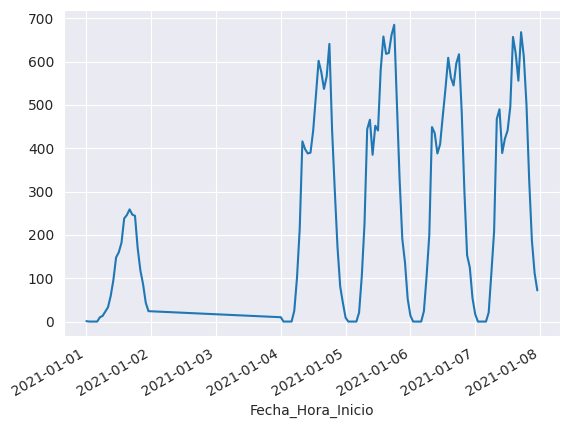

In [ ]:
import matplotlib.pyplot as plt
df_mon_to_fri[0:(24*5)].plot()
plt.show()

Con esta operación, se mostrará un gráfico de línea que representa la cantidad de viajes ('Viajes') durante el período del 4 de enero al 8 de enero de 2021, que corresponde a los días de lunes a viernes en esa semana:

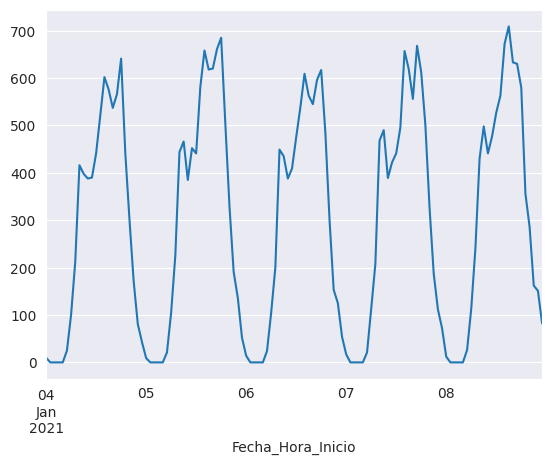

In [ ]:
df_mon_to_fri.loc['2021-01-04':'2021-01-08'].plot()
plt.show()

**Descomposición de una Serie:**

Con esta importación, ahora puedes utilizar la función seasonal_decompose para analizar la estacionalidad y la tendencia en una serie de tiempo y extraer información importante sobre sus patrones:

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df_resample.columns

Index(['Viajes', 'dayofweek'], dtype='object')

Con esta operación, se mostrará un gráfico con los componentes de la descomposición estacional (tendencia, estacionalidad y residuos) de la serie de tiempo 'Viajes' utilizando el modelo aditivo:

<Figure size 1000x600 with 0 Axes>

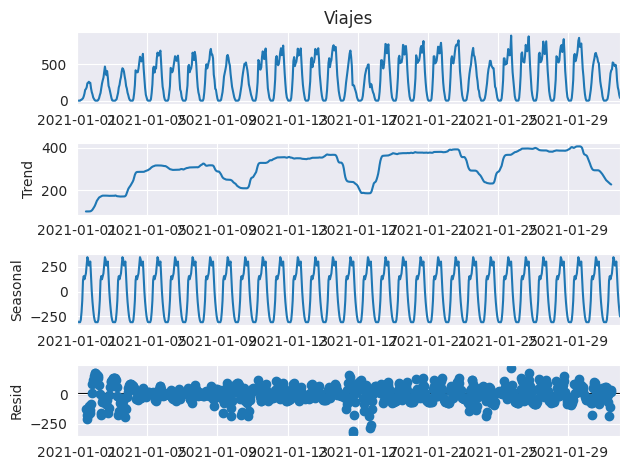

In [ ]:
s_desc = seasonal_decompose(df_resample['Viajes'], model="additive")
plt.figure(figsize=(10, 6))
s_desc.plot()
plt.show()

In [ ]:
# Extraer los residuos de la descomposición
residuals = s_desc.resid

In [ ]:
residuals.isnull().sum()

24

In [ ]:
# Eliminar los valores nulos sobre-escribiendo la serie original
residuals.dropna(inplace=True)

**Prueba estadística para saber si es Aditiva la serie**

In [ ]:
from statsmodels.tsa.stattools import kpss
# Realizar la prueba KPSS para la estacionalidad constante
kpss_stat, p_value, lags, critical_values = kpss(residuals, nlags='auto')

# Imprimir los resultados
print(f'KPSS Statistic: {kpss_stat}')
print(f'p-value: {p_value}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

KPSS Statistic: 0.01107912336976767
p-value: 0.1
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


En este caso, como el valor de la estadística de la prueba (0.01107912336976767) es menor que los valores críticos para todos los niveles de significancia, no se puede rechazar la hipótesis nula y se concluye que la serie es estacionaria. Esto sugiere que el modelo podría ser aditivo.

In [ ]:
df_resample.head()

,Viajes,dayofweek
Fecha_Hora_Inicio,,
2021-01-01 00:00:00,1,4
2021-01-01 01:00:00,0,4
2021-01-01 02:00:00,0,4
2021-01-01 03:00:00,0,4
2021-01-01 04:00:00,0,4


In [ ]:
# Comprobando el tipo de dato del indice del Objeto de tipo Serie de Pandas:
tipo_dato = df_resample.index.dtype
print(tipo_dato)


datetime64[ns]


Con esta operación, se mostrará un gráfico de caja donde cada caja representa la distribución de los valores de 'Viajes' para cada día de la semana. Los puntos fuera de las cajas pueden ser valores atípicos o datos extremos:

<Axes: xlabel='dayofweek', ylabel='Viajes'>

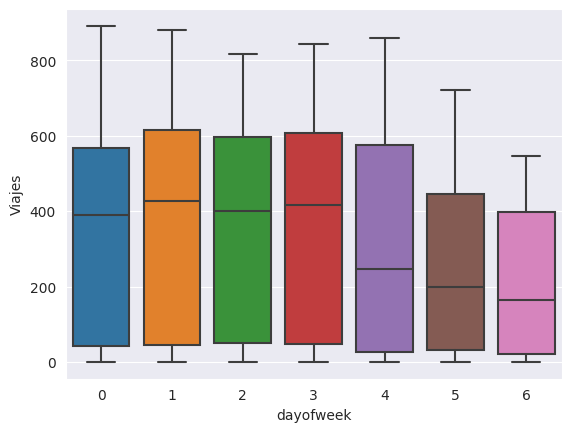

In [ ]:
# graficar la estacionalidad:
import seaborn as sbn
sbn.boxplot(data=df_resample, x= 'dayofweek', y='Viajes')

El paquete pmdarima (Pyramid ARIMA) es una biblioteca de Python que proporciona herramientas para realizar análisis de series de tiempo y ajustar modelos ARIMA (AutoRegressive Integrated Moving Average) de manera automatizada. El objetivo principal de pmdarima es simplificar y agilizar el proceso de selección de parámetros óptimos para modelos ARIMA:

In [ ]:
#Testing for stationarity
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.0 MB/s eta 0:00:00


**Estacionalidad**

Con esta operación, la variable num_diffs contendrá el número óptimo de diferenciaciones no estacionales requeridas para la serie de tiempo 'Viajes' en el DataFrame df_resample, seleccionado utilizando el criterio de Chauvenet. El número óptimo de diferenciaciones no estacionales es útil para determinar el orden d en un modelo ARIMA y garantizar que la serie de tiempo sea estacionaria antes de ajustar el modelo.

In [ ]:
from pmdarima.arima.utils import nsdiffs
nsdiffs(df_resample.Viajes, test='ch',m=24)

0

In [ ]:
from pmdarima.arima.utils import ndiffs
ndiffs(df_resample.Viajes, test='pp')

0

**Estacionariedad:**

**Test ADF**

la función adfuller es una herramienta útil para evaluar la estacionariedad de una serie de tiempo mediante la prueba ADF. Los resultados de esta prueba pueden ayudar a determinar si se necesitan diferenciaciones u otras transformaciones para hacer que la serie sea estacionaria antes de aplicar modelos de análisis de series de tiempo:




In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
  result = adfuller(series, autolag='AIC')
  print(f'ADF Statistic :{result[0]}')
  print(f'p-value: {result[1]}')
  print(f'n_lags: {result[2]}')
  for key, value in result[4].items():
    print('Critical Values:')
    print(f'{key},{value}')
  print(f'Result: The Series is {"not" if result[1]>0.05 else ""}stationary')

In [ ]:
adf_test(df_resample.Viajes)

ADF Statistic :-3.067161456318712
p-value: 0.029080778549962345
n_lags: 20
Critical Values:
1%,-3.4394269973845657
Critical Values:
5%,-2.8655458544300387
Critical Values:
10%,-2.568903174551249
Result: The Series is stationary


**Test KPSS:**

la función kpss es otra herramienta valiosa para evaluar la estacionariedad de una serie de tiempo. Los resultados de esta prueba pueden ayudar a determinar si la serie de tiempo tiene tendencias determinísticas que la hacen no estacionaria:

In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def kpss_test(series, **kw):
  statistic, p_value, n_lags, critical_values = kpss(series, **kw)
  # Formato de salida:
  print(f'KPSS statistic: {statistic}')
  print(f'p-value: {p_value}')
  print(f'num_lags: {n_lags}')
  print("Critical values: ")
  for key, value in critical_values.items():
    print(f' {key}:{value}')
  print(f'Result: The serie is {"not" if p_value < 0.05 else ""} stationary')

In [ ]:
kpss_test(df_resample.Viajes)

KPSS statistic: 0.6007958243495594
p-value: 0.022564015968221874
num_lags: 15
Critical values: 
 10%:0.347
 5%:0.463
 2.5%:0.574
 1%:0.739
Result: The serie is not stationary


In [ ]:
df_resample.head()

,Viajes,dayofweek
Fecha_Hora_Inicio,,
2021-01-01 00:00:00,1,4
2021-01-01 01:00:00,0,4
2021-01-01 02:00:00,0,4
2021-01-01 03:00:00,0,4
2021-01-01 04:00:00,0,4


**Correlogramas:**

La biblioteca statsmodels.graphics.tsaplots proporciona herramientas para crear diferentes tipos de gráficos y visualizaciones para el análisis de series de tiempo. Algunas de las funciones importantes que ofrece son:

plot_acf: Esta función se utiliza para trazar la función de autocorrelación (ACF) de una serie de tiempo. La ACF muestra la correlación entre una serie y sus valores rezagados en diferentes períodos de tiempo.

plot_pacf: Esta función traza la función de autocorrelación parcial (PACF) de una serie de tiempo. La PACF muestra la correlación parcial entre una serie y sus valores rezagados, después de eliminar la influencia de los rezagos intermedios.






In [ ]:
import statsmodels.graphics.tsaplots as sgt

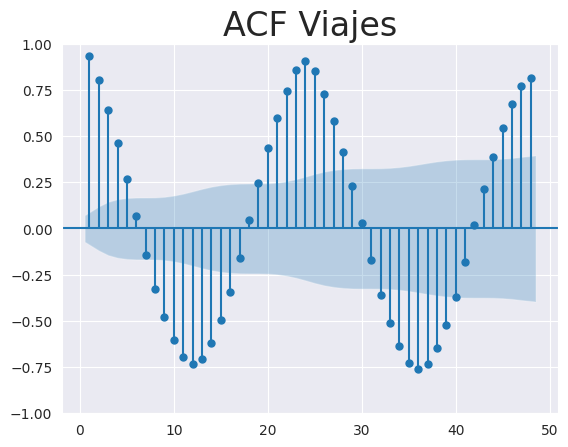

In [ ]:
sgt.plot_acf(df_resample.Viajes, lags=48, zero=False)
plt.title("ACF Viajes", size=24)
plt.show()

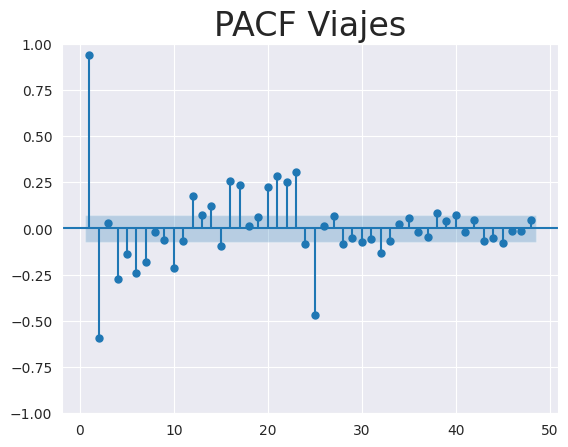

In [ ]:
sgt.plot_pacf(df_resample.Viajes, lags=48, zero=False, method=('ols'))
plt.title("PACF Viajes", size=24)
plt.show()

**Modelo Automático**

la función auto_arima es una herramienta poderosa para automatizar la selección de los parámetros de un modelo ARIMA o SARIMA. La función realiza una búsqueda exhaustiva o aleatoria (según la configuración) para encontrar el mejor modelo que se ajuste a la serie de tiempo:

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model_1 = auto_arima(df_resample.Viajes, )
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  744
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -4201.827
Date:                Sun, 23 Jul 2023   AIC                           8415.654
Time:                        02:34:25   BIC                           8443.327
Sample:                    01-01-2021   HQIC                          8426.321
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     18.3373      2.367      7.748      0.000      13.699      22.976
ar.L1          1.8396      0.037     49.617      0.000       1.767       1.912
ar.L2         -0.8995      0.034    -26.841      0.000      -0.965      -0.834
ma.L1         -0.3678      0.041     -8.894      0.000      -0.449      -0.287
ma.L2         -0.3697      0.040     -9.334      0.000      -0.447      -0.292
sigma2      4688.2146    202.292     23.176      0.000    4291.730    5084.699
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):               111.88
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El código realiza una división de una serie de tiempo en conjuntos de entrenamiento y prueba utilizando un porcentaje específico de datos para el conjunto de entrenamiento y el resto para el conjunto de prueba:

In [ ]:
size = int(len(df_resample)*0.8)
df_train, df_test = df_resample.iloc[:size], df_resample.iloc[size:]

In [ ]:
df_train.shape

(595, 2)

La función fit se utiliza para ajustar el modelo a los datos de entrenamiento y estimar los parámetros óptimos del modelo:

In [ ]:
model_1.fit(df_train.Viajes)

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

el objeto future_forecast contendrá los pronósticos generados por el modelo model_1 para los próximos 3 períodos de tiempo después del último índice en df_test. Los pronósticos se almacenan en un DataFrame con índices coincidentes con los de df_test para que puedas comparar y evaluar la precisión del modelo con los datos reales en el conjunto de prueba:

In [ ]:
future_forecast = model_1.predict(len(df_test),len(df_test)+2)
future_forecast = pd.DataFrame(future_forecast,index=df_test.index,columns=['Prediction'])
future_forecast

,Prediction
Fecha_Hora_Inicio,
2021-01-25 19:00:00,923.001173
2021-01-25 20:00:00,832.412903
2021-01-25 21:00:00,719.455696
2021-01-25 22:00:00,592.760346
2021-01-25 23:00:00,460.934602
...,...
2021-01-31 19:00:00,295.862040
2021-01-31 20:00:00,295.956590
2021-01-31 21:00:00,296.062102


La función pd.concat se utiliza para concatenar objetos de pandas, en este caso, los valores reales de la serie de tiempo (df_test.Viajes) y los pronósticos generados (future_forecast.Prediction). Esto crea un nuevo DataFrame llamado df_concatenado que contiene ambos conjuntos de datos juntos:

<Axes: xlabel='Fecha_Hora_Inicio'>

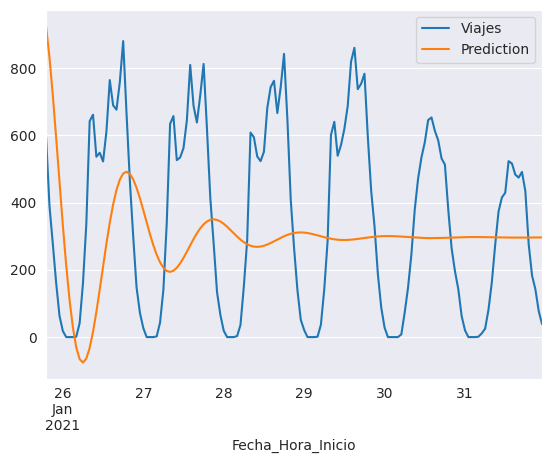

In [ ]:
pd.concat([df_test.Viajes, future_forecast.Prediction],axis=1).plot()

El código que has proporcionado concatena las columnas 'Viajes' de df_resample y 'Prediction' de future_forecast, y luego traza un gráfico para comparar los valores reales con los pronósticos generados por el modelo:

<Axes: xlabel='Fecha_Hora_Inicio'>

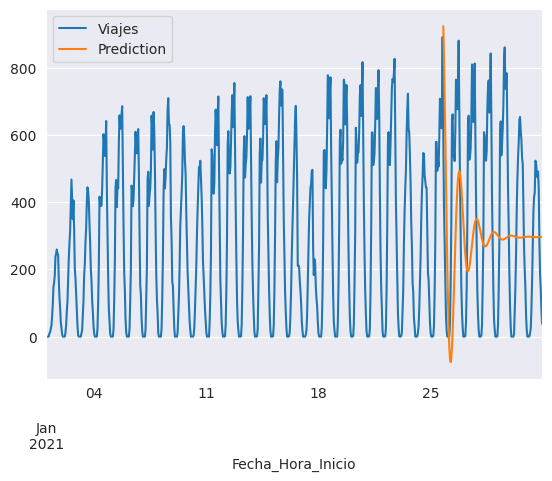

In [ ]:
pd.concat([df_resample.Viajes, future_forecast.Prediction],axis=1).plot()

Vamos a utilizar la librería arima_model para ejecutar el modelo ARIMA con los hiperpámetros seleccionados:

In [ ]:
import statsmodels.tsa.arima.model as arima_model

import warnings
warnings.filterwarnings("ignore")

In [ ]:
model_2 = arima_model.ARIMA(df_resample.Viajes, order=(2,0,2))

In [ ]:
results1 = model_2.fit()


El código results1.summary() probablemente muestra un resumen de los resultados obtenidos después de ajustar un modelo ARIMA utilizando la biblioteca statsmodels:




In [ ]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Viajes   No. Observations:                  744
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -4201.829
Date:                Sun, 23 Jul 2023   AIC                           8415.659
Time:                        02:34:35   BIC                           8443.331
Sample:                    01-01-2021   HQIC                          8426.325
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        305.3626     17.859     17.099      0.000     270.360     340.365
ar.L1          1.8396      0.037     49.576      0.000       1.767       1.912
ar.L2         -0.8994      0.034    -26.814      0.000      -0.965      -0.834
ma.L1         -0.3678      0.041     -8.886      0.000      -0.449      -0.287
ma.L2         -0.3695      0.040     -9.322      0.000      -0.447      -0.292
sigma2      4687.2834    202.091     23.194      0.000    4291.192    5083.375
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):               111.92
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               1.76   Skew:                             0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

El objeto forecast1 contendrá los pronósticos generados por el modelo results1 para los próximos 24 pasos de tiempo después del último índice en df_resample. Los pronósticos se almacenan en una serie de pandas y se identifican con el nombre "forecast":

In [ ]:
forecast1 = results1.predict(len(df_resample),len(df_resample)+24).rename("forecast")

[Text(0.5, 0, 'Tiempo'), Text(0, 0.5, 'Cantidad')]

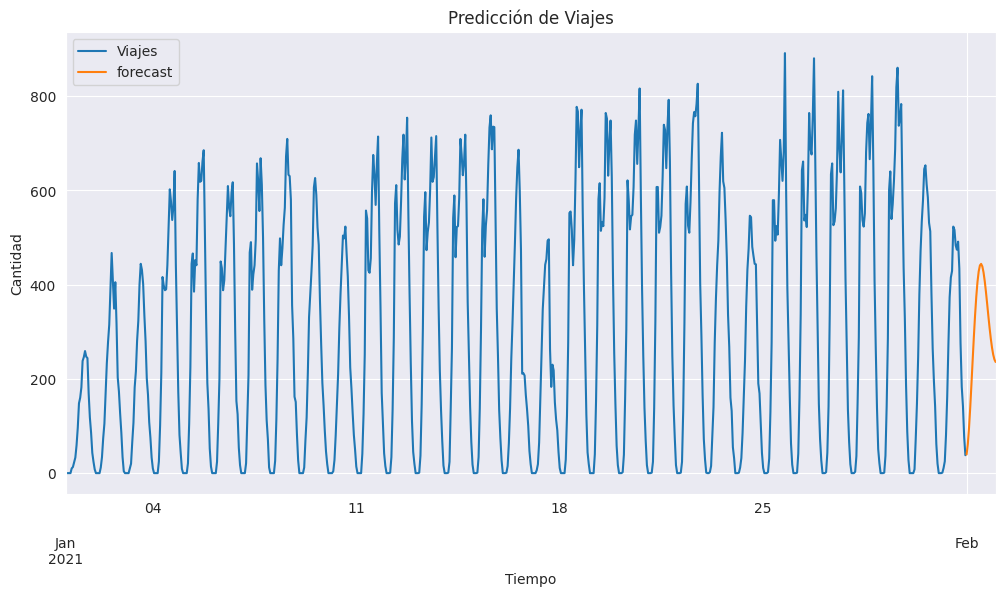

In [ ]:
title = "Predicción de Viajes"
ylabel="Cantidad"
xlabel="Tiempo"

ax = df_resample['Viajes'].plot(legend=True, figsize=(12,6), title=title)
forecast1.plot(legend=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

El modelo SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables) es una extensión del modelo ARIMA (Autoregressive Integrated Moving Average) que permite manejar series de tiempo con componentes estacionales y variables exógenas. El modelo SARIMAX es especialmente útil para analizar y pronosticar series de tiempo que exhiben patrones estacionales y que pueden estar influenciadas por factores externos. Para nuestro caso, vamos a utilizar como variable estacional, el día y como variable exógena, las horas, para lograr captar la estacionalidad de la serie de tiempo:

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# definir conjunto de datos
x = df_mon_to_fri

# instanciar modelo
sarima_model = SARIMAX(x, order=(2,0,1), seasonal_order=(2, 1, 0, 24))

# ajustar modelo
results = sarima_model.fit()

# mirar el AIC
results.aic

4786.640494373207

 Con el siguiente método .summary() recibirás un resumen detallado de los resultados del modelo ajustado. Este resumen incluye información relevante sobre el ajuste del modelo, las estimaciones de los parámetros y las estadísticas de diagnóstico:

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Viajes   No. Observations:                  504
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 24)   Log Likelihood               -2387.320
Date:                             Sun, 23 Jul 2023   AIC                           4786.640
Time:                                     02:34:49   BIC                           4811.683
Sample:                                          0   HQIC                          4796.484
                                             - 504                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1749      0.310      3.789      0.000       0.567       1.783
ar.L2         -0.2497      0.268     -0.931      0.352      -0.775       0.276
ma.L1         -0.4334      0.298     -1.456      0.145      -1.017       0.150
ar.S.L24      -0.5046      0.034    -15.013      0.000      -0.570      -0.439
ar.S.L48      -0.2588      0.035     -7.457      0.000      -0.327      -0.191
sigma2      1198.9029     51.373     23.337      0.000    1098.215    1299.591
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               345.14
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Fecha_Hora_Inicio'>

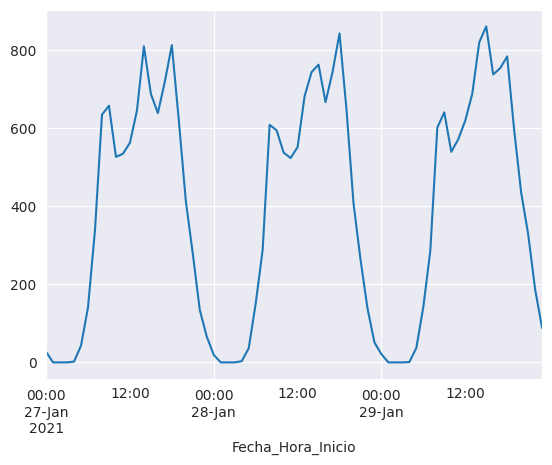

In [ ]:
# tomar de datos originales dias 27-ene, 28-ene, y 29-ene y graficarlos:
df_27_29 = df_mon_to_fri.loc['2021-01-27':'2021-01-29']
df_27_29.plot()



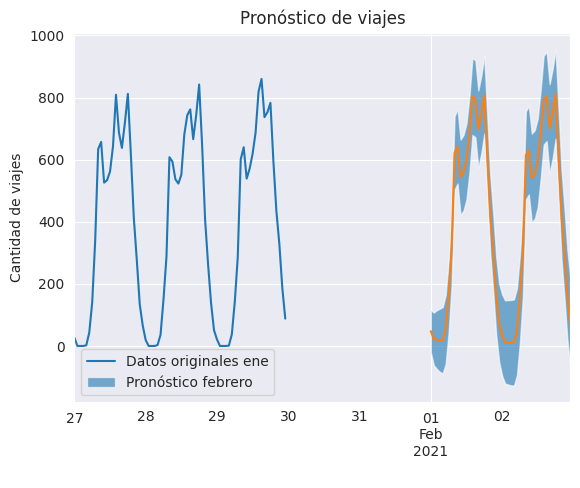

In [ ]:
# tomar de datos originales dias 27-ene, 28-ene, y 29-ene para graficarlos:
df_27_29 = df_mon_to_fri.loc['2021-01-27':'2021-01-29']
df_27_29.plot()

# Obtener el intervalo de confianza de las predicciones futuras para los próximos 48 pasos (24*2) de tiempo (horas):
pred_1_2_conf = results.get_forecast(steps=24*2).conf_int()
# Establecer las fechas como índices para el intervalo de confianza:
pred_1_2_conf.index = pd.date_range(start='02/1/2021', end='02/3/2021', freq='H')[:-1]
# Crear un rango de fechas para el eje x del gráfico:
x = pd.date_range(start='02/1/2021', end='02/3/2021', freq='H')[:-1]
# Extraer los límites inferior (y1) y superior (y2) del intervalo de confianza para el eje y del gráfico:
y1 = pred_1_2_conf['lower Viajes']
y2 = pred_1_2_conf['upper Viajes']
# Rellenar el área entre y1 y y2 con un nivel de transparencia de 0.6 para crear el gráfico de área sombreada:
plt.fill_between(x, y1, y2, alpha=0.6)

# predecir para 1-feb y 2-feb,
# Obtener las predicciones medias para los próximos 48 pasos de tiempo (24 * 2):
pred_1_2 = results.get_forecast(steps=24*2).predicted_mean
# Establecer las fechas como índices para las predicciones medias:
pred_1_2.index = pd.date_range(start='02/1/2021', end='02/3/2021', freq='H')[:-1]
# Crear un gráfico de línea para visualizar las predicciones medias:
pred_1_2.plot()

# formato de la grafica final
plt.title('Pronóstico de viajes')
plt.ylabel('Cantidad de viajes')
plt.xlabel('Semana mie-27-ene al mie-03-feb')
plt.xlabel(' ')
plt.legend(('Datos originales ene', 'Pronóstico febrero'),
           loc='lower left')
#plt.savefig('pronostico.png', dpi=200)
plt.show()

In [ ]:
# Convertir las predicciones medias en un DataFrame con una columna llamada 'Predicción':
pred_1_2_df = pred_1_2.to_frame(name='Predicción')

In [ ]:
type(pred_1_2_df)

pandas.core.frame.DataFrame

In [ ]:
pred_1_2_df

,Predicción
2021-02-01 00:00:00,47.545880
2021-02-01 01:00:00,22.981530
2021-02-01 02:00:00,20.637744
2021-02-01 03:00:00,18.509120
2021-02-01 04:00:00,18.343857
2021-02-01 05:00:00,53.180810
2021-02-01 06:00:00,157.040488
2021-02-01 07:00:00,312.156139
2021-02-01 08:00:00,621.971485
2021-02-01 09:00:00,642.691174


**Residuos**

En el contexto de series de tiempo, los residuos (también conocidos como errores o innovaciones) son las diferencias entre los valores observados de la serie y las predicciones hechas por un modelo. En otras palabras, los residuos representan el error de pronóstico del modelo en cada punto de tiempo:

In [ ]:
# Obtener los residuos del modelo ajustado:
residuos = results.resid.iloc[:]


In [ ]:
residuos

Fecha_Hora_Inicio
2021-01-01 00:00:00     1.000000
2021-01-01 01:00:00    -0.004099
2021-01-01 02:00:00    -0.003540
2021-01-01 03:00:00    -0.003098
2021-01-01 04:00:00    -0.002716
                         ...    
2021-01-29 19:00:00    -9.726989
2021-01-29 20:00:00    50.457501
2021-01-29 21:00:00    48.643634
2021-01-29 22:00:00     9.134682
2021-01-29 23:00:00   -10.396070
Length: 504, dtype: float64

In [ ]:
type(residuos)

pandas.core.series.Series

In [ ]:
residuos.tail()

Fecha_Hora_Inicio
2021-01-29 19:00:00    -9.726989
2021-01-29 20:00:00    50.457501
2021-01-29 21:00:00    48.643634
2021-01-29 22:00:00     9.134682
2021-01-29 23:00:00   -10.396070
dtype: float64

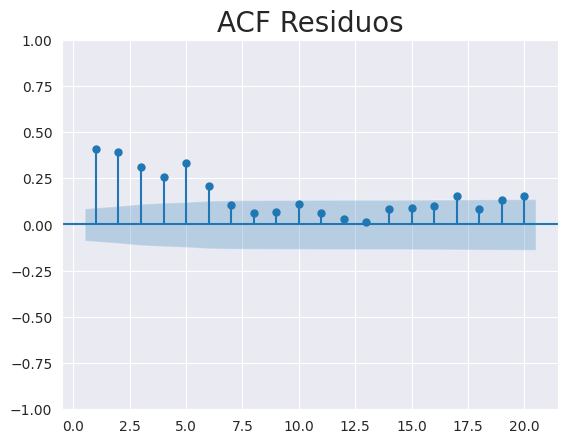

In [ ]:
# Crear y mostrar el gráfico de la función de autocorrelación (ACF) de los residuos:
sgt.plot_acf(residuos, zero=False, lags=20)
plt.title("ACF Residuos", size=20)
plt.show()

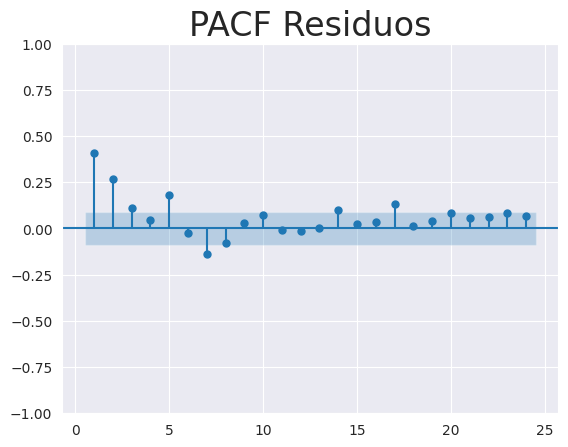

In [ ]:
# Crear y mostrar el gráfico de la función de autocorrelación parcial (PACF) de los residuos:
sgt.plot_pacf(residuos, lags=24, zero=False, method=('ols'))
plt.title("PACF Residuos", size=24)
plt.show()

In [ ]:
type(df_mon_to_fri)

pandas.core.series.Series

In [ ]:
df_mon_to_fri.name

'Viajes'

Vamos a volver a ejecutar el modelo SARIMAX pero ajustando los parámetros para obtener un mejor resultado de predicción, que lo vamos a comprobar utilizando el método .summary() para extraer los parámetros estadísticos de evaluación del modelo: y como vemos en la salida por pantalla, hemo mejorado los coficientes del modelo AR y del primer coeficiente del modelo de MA, con el indicador p-value igual a 0:

In [ ]:
# definir conjunto de datos
x_1 = df_mon_to_fri

# instanciar modelo
sarima_model_2 = SARIMAX(x_1, order=(2,0,2), seasonal_order=(2, 1, 0, 24))

# ajustar modelo
results_2 = sarima_model_2.fit()

# mirar el AIC
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                              Viajes   No. Observations:                  504
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 24)   Log Likelihood               -2384.721
Date:                             Sun, 23 Jul 2023   AIC                           4783.443
Time:                                     02:35:16   BIC                           4812.659
Sample:                                          0   HQIC                          4794.927
                                             - 504                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0842      0.029     -2.945      0.003      -0.140      -0.028
ar.L2          0.8533      0.026     32.909      0.000       0.802       0.904
ma.L1          0.8414      0.086      9.787      0.000       0.673       1.010
ma.L2         -0.1577      0.039     -4.055      0.000      -0.234      -0.081
ar.S.L24      -0.4994      0.034    -14.559      0.000      -0.567      -0.432
ar.S.L48      -0.2504      0.035     -7.126      0.000      -0.319      -0.182
sigma2      1178.3283     98.200     11.999      0.000     985.860    1370.797
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               321.57
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             0.79
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

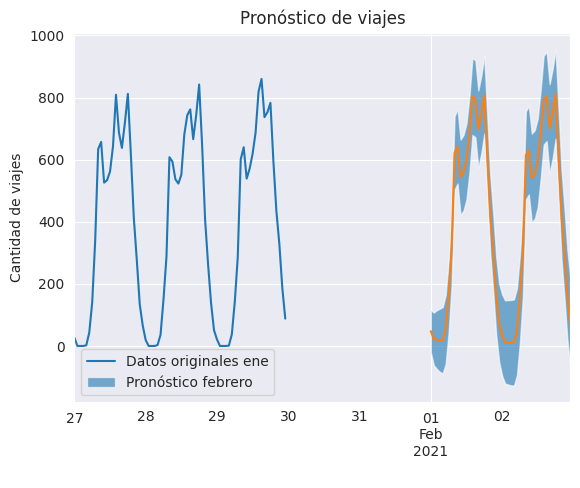

In [ ]:
# tomar de datos originales dias 27-ene, 28-ene, y 29-ene
df_27_29 = df_mon_to_fri.loc['2021-01-27':'2021-01-29']
df_27_29.plot()
# agregar bandas de confianza
pred_1_2_mod2 = results.get_forecast(steps=24*2).conf_int()
pred_1_2_mod2.index = pd.date_range(start='02/1/2021', end='02/3/2021', freq='H')[:-1]
x_ = pd.date_range(start='02/1/2021', end='02/3/2021', freq='H')[:-1]
y1_ = pred_1_2_mod2['lower Viajes']
y2_ = pred_1_2_mod2['upper Viajes']
plt.fill_between(x_, y1_, y2_, alpha=0.6)

# predecir para 1-feb y 2-feb:
pred_1_2_mod2 = results.get_forecast(steps=24*2).predicted_mean
pred_1_2_mod2.index = pd.date_range(start='02/1/2021', end='02/3/2021', freq='H')[:-1]
pred_1_2_mod2.plot()

# formato de la grafica final
plt.title('Pronóstico de viajes')
plt.ylabel('Cantidad de viajes')
plt.xlabel('Semana mie-27-ene al mie-03-feb')
plt.xlabel(' ')
plt.legend(('Datos originales ene', 'Pronóstico febrero'),
           loc='lower left')
#plt.savefig('pronostico.png', dpi=200)
plt.show()

In [ ]:
df_pred_1_2_mod2 = pred_1_2_mod2.to_frame(name='Predicción')

In [ ]:
df_pred_1_2_mod2.head()

,Predicción
2021-02-01 00:00:00,47.545880
2021-02-01 01:00:00,22.981530
2021-02-01 02:00:00,20.637744
2021-02-01 03:00:00,18.509120
2021-02-01 04:00:00,18.343857


In [ ]:
df_pred_1_2_mod2.shape

(48, 1)

In [ ]:
df_pred_1_2_mod2.tail()

,Predicción
2021-02-02 19:00:00,619.689578
2021-02-02 20:00:00,423.540662
2021-02-02 21:00:00,299.192935
2021-02-02 22:00:00,163.253884
2021-02-02 23:00:00,72.277472


Ahora vamos a cargar los datos del mes de Febrero para compararlos con los datos de la predicción para los dos primeros días de Febrero de 2021, recordar que en el país de México el día 1o de Febrero fue un día inhabil por lo que ese día no se ajusta tal cual la predicción a los datos reales, pero el día 2 de Febrero tienen muy buen ajuste los datos predictivos con los reles:

**Datos de Febrero**

In [ ]:
# Cargar el archivo CSV
df_feb_21 = pd.read_csv('/content/drive/MyDrive/2021-02.csv')

In [ ]:
df_feb_21.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo
0,M,33.0,10427.0,390.0,01/02/2021,8:04:49,315,01/02/2021,8:12:03
1,F,62.0,11429.0,254.0,01/02/2021,8:20:00,272,01/02/2021,8:26:07
2,M,30.0,9959.0,476.0,01/02/2021,8:54:31,24,01/02/2021,9:05:32
3,M,31.0,4044.0,256.0,01/02/2021,9:02:04,147,01/02/2021,9:16:42
4,NaN,33.0,9986.0,450.0,01/02/2021,8:56:40,105,01/02/2021,9:25:04


In [ ]:
viajes_feb = df_feb_21.copy()

In [ ]:
viajes_feb.shape

(289785, 9)

In [ ]:
viajes_feb.dropna(inplace=True)


In [ ]:
viajes_feb.isna().sum()

Genero_Usuario           0
Edad_Usuario             0
Bici                     0
Ciclo_Estacion_Retiro    0
Fecha_Retiro             0
Hora_Retiro              0
Ciclo_Estacion_Arribo    0
Fecha_Arribo             0
Hora_Arribo              0
dtype: int64

In [ ]:
# concatenar Hora_Retiro y Fecha_Retiro
viajes_feb['fecha_hora_retiro'] = viajes_feb.Fecha_Retiro + ' ' + viajes_feb.Hora_Retiro

# cambiar de str a datetime
viajes_feb['fecha_hora'] = viajes_feb.fecha_hora_retiro \
                             .map(lambda x : datetime.strptime(x, '%d/%m/%Y %H:%M:%S'))

# reindexar el dataframe
viajes_feb.index = viajes_feb.fecha_hora

# limpiar valores de otros años
viajes_feb = viajes_feb.loc['2021-02']
viajes_feb.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,fecha_hora_retiro,fecha_hora
fecha_hora,,,,,,,,,,,
2021-02-01 08:04:49,M,33.0,10427.0,390.0,01/02/2021,8:04:49,315,01/02/2021,8:12:03,01/02/2021 8:04:49,2021-02-01 08:04:49
2021-02-01 08:20:00,F,62.0,11429.0,254.0,01/02/2021,8:20:00,272,01/02/2021,8:26:07,01/02/2021 8:20:00,2021-02-01 08:20:00
2021-02-01 08:54:31,M,30.0,9959.0,476.0,01/02/2021,8:54:31,24,01/02/2021,9:05:32,01/02/2021 8:54:31,2021-02-01 08:54:31
2021-02-01 09:02:04,M,31.0,4044.0,256.0,01/02/2021,9:02:04,147,01/02/2021,9:16:42,01/02/2021 9:02:04,2021-02-01 09:02:04
2021-02-01 09:09:54,F,32.0,8535.0,105.0,01/02/2021,9:09:54,123,01/02/2021,9:25:14,01/02/2021 9:09:54,2021-02-01 09:09:54


In [ ]:
df_filtrado_feb = viajes_feb[(viajes_feb['fecha_hora'] >= '2021-02-01') & (viajes_feb['fecha_hora'] <= '2021-02-02')]


In [ ]:
df_filtrado_feb.shape

(6111, 11)

In [ ]:
df_filtrado_feb

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,fecha_hora_retiro,fecha_hora
fecha_hora,,,,,,,,,,,
2021-02-01 08:04:49,M,33.0,10427.0,390.0,01/02/2021,8:04:49,315,01/02/2021,8:12:03,01/02/2021 8:04:49,2021-02-01 08:04:49
2021-02-01 08:20:00,F,62.0,11429.0,254.0,01/02/2021,8:20:00,272,01/02/2021,8:26:07,01/02/2021 8:20:00,2021-02-01 08:20:00
2021-02-01 08:54:31,M,30.0,9959.0,476.0,01/02/2021,8:54:31,24,01/02/2021,9:05:32,01/02/2021 8:54:31,2021-02-01 08:54:31
2021-02-01 09:02:04,M,31.0,4044.0,256.0,01/02/2021,9:02:04,147,01/02/2021,9:16:42,01/02/2021 9:02:04,2021-02-01 09:02:04
2021-02-01 09:09:54,F,32.0,8535.0,105.0,01/02/2021,9:09:54,123,01/02/2021,9:25:14,01/02/2021 9:09:54,2021-02-01 09:09:54
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01 21:34:46,M,25.0,9212.0,329.0,01/02/2021,21:34:46,366,01/02/2021,21:44:55,01/02/2021 21:34:46,2021-02-01 21:34:46
2021-02-01 22:10:59,F,32.0,9334.0,28.0,01/02/2021,22:10:59,271,01/02/2021,22:26:31,01/02/2021 22:10:59,2021-02-01 22:10:59
2021-02-01 23:22:36,M,33.0,10408.0,128.0,01/02/2021,23:22:36,121,01/02/2021,23:24:54,01/02/2021 23:22:36,2021-02-01 23:22:36


In [ ]:
# resample y agregacion por dia de mes
viajes_resample_day_feb = viajes_feb.Bici.resample('H').count()

# asignar día de la semana
df_resample_feb = pd.concat([viajes_resample_day_feb], axis=1)
df_resample_feb['dayofweek'] = df_resample_feb.index.dayofweek # 0 es lunes

# lunes a viernes
df_mon_to_fri_feb = df_resample_feb[df_resample_feb.dayofweek.isin([0,1,2,3,4])].Bici
df_mon_to_fri_feb.head()

fecha_hora
2021-02-01 00:00:00    14
2021-02-01 01:00:00     0
2021-02-01 02:00:00     0
2021-02-01 03:00:00     0
2021-02-01 04:00:00     0
Name: Bici, dtype: int64

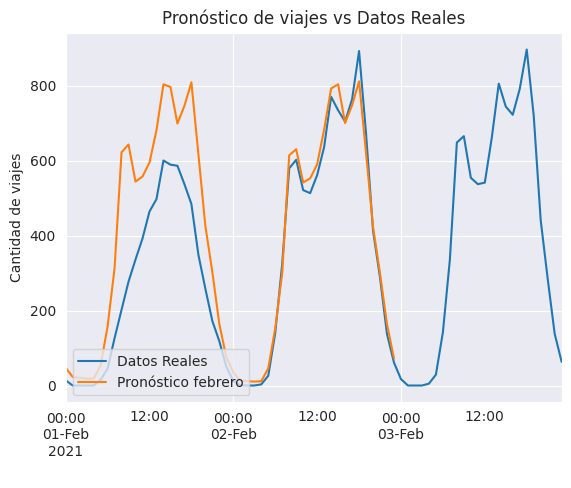

In [ ]:
df_01_03 = df_mon_to_fri_feb.loc['2021-02-01':'2021-02-03']
df_01_03.plot()

pred_1_2_mod2.plot()
# formato de la grafica final
plt.title('Pronóstico de viajes vs Datos Reales')
plt.ylabel('Cantidad de viajes')
plt.xlabel('Semana del 01 al mie-03-feb')
plt.xlabel(' ')
plt.legend(('Datos Reales','Pronóstico febrero'),
           loc='lower left')

plt.show()

Desafortunadamente, cada hiper-parámetro para el modelo SARIMAX será diferente para cada serie de tiempo por ciclo estación, por lo que tenemos que realizar un subset o DataFrame para poder modelarla cada ciclo estación, eso es lo que vamos a hacer en las siguientes celdas:

**Pronosticar por Cicloestacion**

In [ ]:
# Crear subconjunto de datos para la cicloestación deseada
df_subconjunto_1 = df_final[df_final['Ciclo_Estacion_Inicio'] == 18]

In [ ]:
df_subconjunto_1.shape

(1085, 25)

In [ ]:
df_subconjunto_1.head()

,Genero_Usuario,Edad_Usuario,Id_Bici,Ciclo_Estacion_Inicio,Fecha_Inicio,Hora_Inicio,Ciclo_Estacion_Final,Fecha_Final,Hora_Final,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud,Fecha_Hora_Inicio,Fecha_Hora_Final,Dia_Semana,nom_cicloestacion_inicio,Hora_Inicial,Part_del_dia,Duracion_Viaje,Grupos_edades
Fecha_Hora_Inicio,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 07:05:04,M,32,7608,18,01/01/2021,07:05:04,143,01/01/2021,07:13:25,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 07:05:04,2021-01-01 07:13:25,4,Reforma - Río Rhin,7,Matutino,8.350000,26-40
2021-01-01 15:23:42,M,40,6918,18,01/01/2021,15:23:42,18,01/01/2021,16:48:06,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 15:23:42,2021-01-01 16:48:06,4,Reforma - Río Rhin,15,Vepestirno,84.400000,26-40
2021-01-01 11:00:23,M,30,6847,18,01/01/2021,11:00:23,398,01/01/2021,11:35:24,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 11:00:23,2021-01-01 11:35:24,4,Reforma - Río Rhin,11,Matutino,35.016667,26-40
2021-01-01 16:48:35,F,66,11223,18,01/01/2021,16:48:35,25,01/01/2021,17:19:46,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 16:48:35,2021-01-01 17:19:46,4,Reforma - Río Rhin,16,Vepestirno,31.183333,60+
2021-01-01 14:18:13,M,22,4246,18,01/01/2021,14:18:13,34,01/01/2021,14:30:18,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 14:18:13,2021-01-01 14:30:18,4,Reforma - Río Rhin,14,Vepestirno,12.083333,18-25


In [ ]:
df_subconjunto_1.tail()

,Genero_Usuario,Edad_Usuario,Id_Bici,Ciclo_Estacion_Inicio,Fecha_Inicio,Hora_Inicio,Ciclo_Estacion_Final,Fecha_Final,Hora_Final,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud,Fecha_Hora_Inicio,Fecha_Hora_Final,Dia_Semana,nom_cicloestacion_inicio,Hora_Inicial,Part_del_dia,Duracion_Viaje,Grupos_edades
Fecha_Hora_Inicio,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-31 17:09:01,M,37,8236,18,31/01/2021,17:09:01,62,31/01/2021,17:44:43,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-31 17:09:01,2021-01-31 17:44:43,6,Reforma - Río Rhin,17,Vepestirno,35.700000,26-40
2021-01-31 14:19:25,M,37,9762,18,31/01/2021,14:19:25,232,31/01/2021,14:37:17,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-31 14:19:25,2021-01-31 14:37:17,6,Reforma - Río Rhin,14,Vepestirno,17.866667,26-40
2021-01-31 14:19:36,M,31,7576,18,31/01/2021,14:19:36,232,31/01/2021,14:37:32,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-31 14:19:36,2021-01-31 14:37:32,6,Reforma - Río Rhin,14,Vepestirno,17.933333,26-40
2021-01-31 16:43:25,M,45,9446,18,31/01/2021,16:43:25,11,31/01/2021,17:29:47,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-31 16:43:25,2021-01-31 17:29:47,6,Reforma - Río Rhin,16,Vepestirno,46.366667,41-60
2021-01-31 17:14:58,M,27,12026,18,31/01/2021,17:14:58,206,31/01/2021,17:43:02,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-31 17:14:58,2021-01-31 17:43:02,6,Reforma - Río Rhin,17,Vepestirno,28.066667,26-40


In [ ]:
df_subconjunto_1.sort_index(inplace=True)


In [ ]:
df_subconjunto_1.head()

,Genero_Usuario,Edad_Usuario,Id_Bici,Ciclo_Estacion_Inicio,Fecha_Inicio,Hora_Inicio,Ciclo_Estacion_Final,Fecha_Final,Hora_Final,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud,Fecha_Hora_Inicio,Fecha_Hora_Final,Dia_Semana,nom_cicloestacion_inicio,Hora_Inicial,Part_del_dia,Duracion_Viaje,Grupos_edades
Fecha_Hora_Inicio,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01 07:05:04,M,32,7608,18,01/01/2021,07:05:04,143,01/01/2021,07:13:25,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 07:05:04,2021-01-01 07:13:25,4,Reforma - Río Rhin,7,Matutino,8.350000,26-40
2021-01-01 10:24:18,F,37,10024,18,01/01/2021,10:24:18,25,01/01/2021,10:28:15,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 10:24:18,2021-01-01 10:28:15,4,Reforma - Río Rhin,10,Matutino,3.950000,26-40
2021-01-01 10:24:37,M,41,10480,18,01/01/2021,10:24:37,25,01/01/2021,10:28:52,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 10:24:37,2021-01-01 10:28:52,4,Reforma - Río Rhin,10,Matutino,4.250000,41-60
2021-01-01 10:50:55,M,37,3490,18,01/01/2021,10:50:55,18,01/01/2021,19:09:49,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 10:50:55,2021-01-01 19:09:49,4,Reforma - Río Rhin,10,Matutino,498.900000,26-40
2021-01-01 10:50:55,M,37,3490,18,01/01/2021,10:50:55,27,01/01/2021,11:18:57,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-01 10:50:55,2021-01-01 11:18:57,4,Reforma - Río Rhin,10,Matutino,28.033333,26-40


In [ ]:
df_subconjunto_1.tail()

,Genero_Usuario,Edad_Usuario,Id_Bici,Ciclo_Estacion_Inicio,Fecha_Inicio,Hora_Inicio,Ciclo_Estacion_Final,Fecha_Final,Hora_Final,num_cicloestacion,nombre,calle_principal,calle_secundaria,colonia,alcaldia,latitud,longitud,Fecha_Hora_Inicio,Fecha_Hora_Final,Dia_Semana,nom_cicloestacion_inicio,Hora_Inicial,Part_del_dia,Duracion_Viaje,Grupos_edades
Fecha_Hora_Inicio,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-31 17:14:58,M,27,12026,18,31/01/2021,17:14:58,206,31/01/2021,17:43:02,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-31 17:14:58,2021-01-31 17:43:02,6,Reforma - Río Rhin,17,Vepestirno,28.066667,26-40
2021-01-31 17:24:37,M,31,8393,18,31/01/2021,17:24:37,5,31/01/2021,17:30:21,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-31 17:24:37,2021-01-31 17:30:21,6,Reforma - Río Rhin,17,Vepestirno,5.733333,26-40
2021-01-31 17:35:04,F,27,7792,18,31/01/2021,17:35:04,390,31/01/2021,18:11:33,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-31 17:35:04,2021-01-31 18:11:33,6,Reforma - Río Rhin,17,Vepestirno,36.483333,26-40
2021-01-31 17:39:10,M,54,8005,18,31/01/2021,17:39:10,24,31/01/2021,17:43:28,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-31 17:39:10,2021-01-31 17:43:28,6,Reforma - Río Rhin,17,Vepestirno,4.300000,41-60
2021-01-31 22:22:30,F,34,11839,18,31/01/2021,22:22:30,25,31/01/2021,22:28:56,18,Reforma - Río Rhin,Reforma,Río Rhin,Cuauhtémoc,CUAUHTEMOC,19.428802,-99.164381,2021-01-31 22:22:30,2021-01-31 22:28:56,6,Reforma - Río Rhin,22,Nocturno,6.433333,26-40


In [ ]:
viajes_resample_day_ubi_18 = df_subconjunto_1.Id_Bici.resample('H').count()

In [ ]:
viajes_resample_day_ubi_18.head()

Fecha_Hora_Inicio
2021-01-01 07:00:00    1
2021-01-01 08:00:00    0
2021-01-01 09:00:00    0
2021-01-01 10:00:00    4
2021-01-01 11:00:00    1
Freq: H, Name: Id_Bici, dtype: int64

In [ ]:
# asignar día de la semana
df_resample_ubi_18 = pd.concat([viajes_resample_day_ubi_18], axis=1)
df_resample_ubi_18['dayofweek'] = df_resample_ubi_18.index.dayofweek # 0 es lunes

# lunes a viernes
df_mon_to_fri_ubi_18 = df_resample_ubi_18[df_resample_ubi_18.dayofweek.isin([0,1,2,3,4])].Id_Bici
df_mon_to_fri_ubi_18.head()

Fecha_Hora_Inicio
2021-01-01 07:00:00    1
2021-01-01 08:00:00    0
2021-01-01 09:00:00    0
2021-01-01 10:00:00    4
2021-01-01 11:00:00    1
Name: Id_Bici, dtype: int64

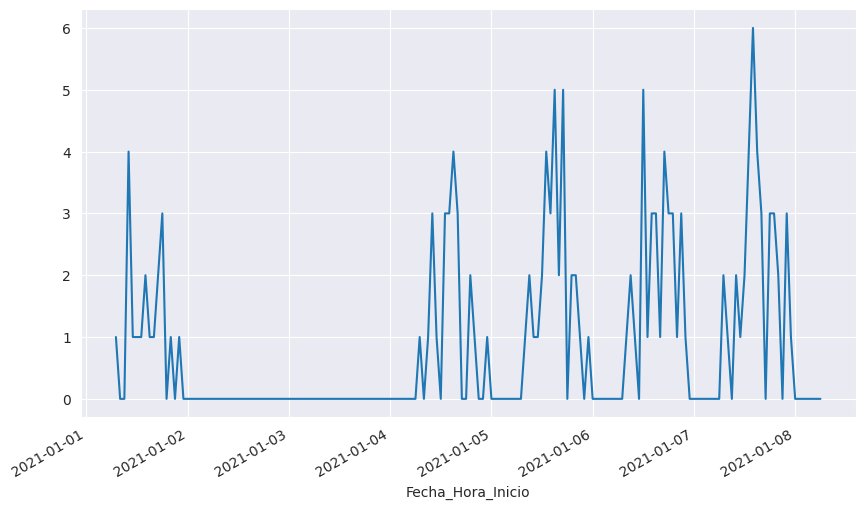

In [ ]:
plt.figure(figsize=(10, 6))
#df_mon_to_fri_ubi_18.plot()
df_mon_to_fri_ubi_18[0:(24*5)].plot()
plt.show()

<Axes: xlabel='Fecha_Hora_Inicio'>

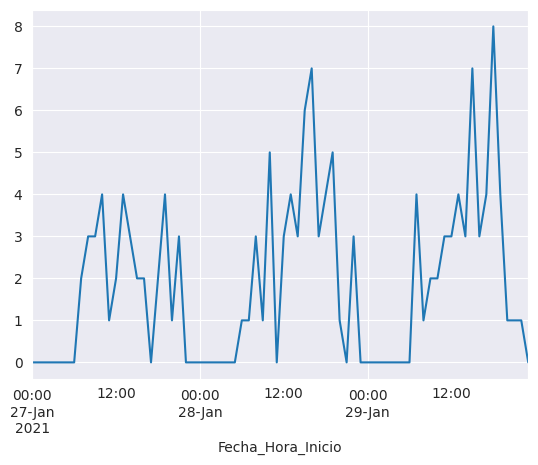

In [ ]:
df_27_29_ubi_18 = df_mon_to_fri_ubi_18.loc['2021-01-27':'2021-01-29']
df_27_29_ubi_18.plot()

<Figure size 1000x600 with 0 Axes>

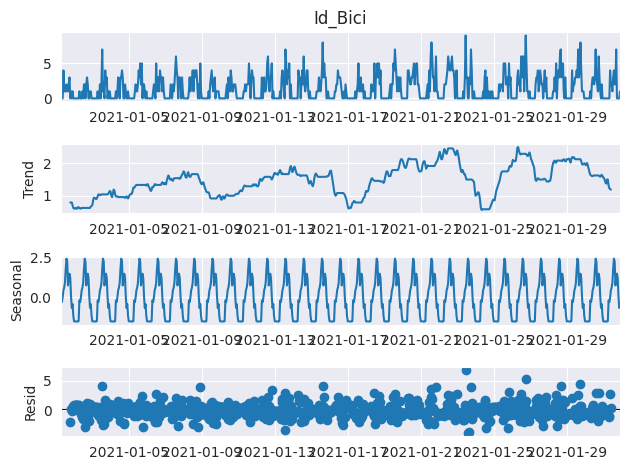

In [ ]:
s_desc_ubi_18 = seasonal_decompose(df_resample_ubi_18['Id_Bici'], model="additive")
plt.figure(figsize=(10, 6))
s_desc_ubi_18.plot()
plt.show()

In [ ]:
automodel_ubi_18 = auto_arima(df_resample_ubi_18.Id_Bici )
automodel_ubi_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  736
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -1269.310
Date:                Sun, 23 Jul 2023   AIC                           2552.620
Time:                        02:36:03   BIC                           2584.819
Sample:                    01-01-2021   HQIC                          2565.039
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9791      0.041     48.495      0.000       1.899       2.059
ar.L2         -1.1007      0.076    -14.577      0.000      -1.249      -0.953
ar.L3          0.0581      0.037      1.551      0.121      -0.015       0.132
ma.L1         -2.8159      0.033    -85.338      0.000      -2.881      -2.751
ma.L2          2.7005      0.066     40.819      0.000       2.571       2.830
ma.L3         -0.8824      0.033    -26.455      0.000      -0.948      -0.817
sigma2         1.8465      0.075     24.667      0.000       1.700       1.993
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               298.40
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               2.06   Skew:                             1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
arima_model_ubi_18 = arima_model.ARIMA(df_resample_ubi_18.Id_Bici, order=(2,1,3))
arima_results_ubi_18 = arima_model_ubi_18.fit()
arima_results_ubi_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Id_Bici   No. Observations:                  736
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1353.490
Date:                Sun, 23 Jul 2023   AIC                           2718.980
Time:                        02:36:04   BIC                           2746.579
Sample:                    01-01-2021   HQIC                          2729.624
                         - 01-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2168      0.084     -2.596      0.009      -0.381      -0.053
ar.L2          0.7601      0.060     12.603      0.000       0.642       0.878
ma.L1         -0.3718      0.090     -4.140      0.000      -0.548      -0.196
ma.L2         -0.9835      0.075    -13.172      0.000      -1.130      -0.837
ma.L3          0.3592      0.058      6.243      0.000       0.246       0.472
sigma2         2.3172      0.094     24.660      0.000       2.133       2.501
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               275.09
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.92   Skew:                             1.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast_arima_model_ubi_18 = arima_results_ubi_18.predict(len(df_resample_ubi_18),len(df_resample_ubi_18)+24).rename('forecast')

[Text(0.5, 0, 'Tiempo'), Text(0, 0.5, 'Cantidad')]

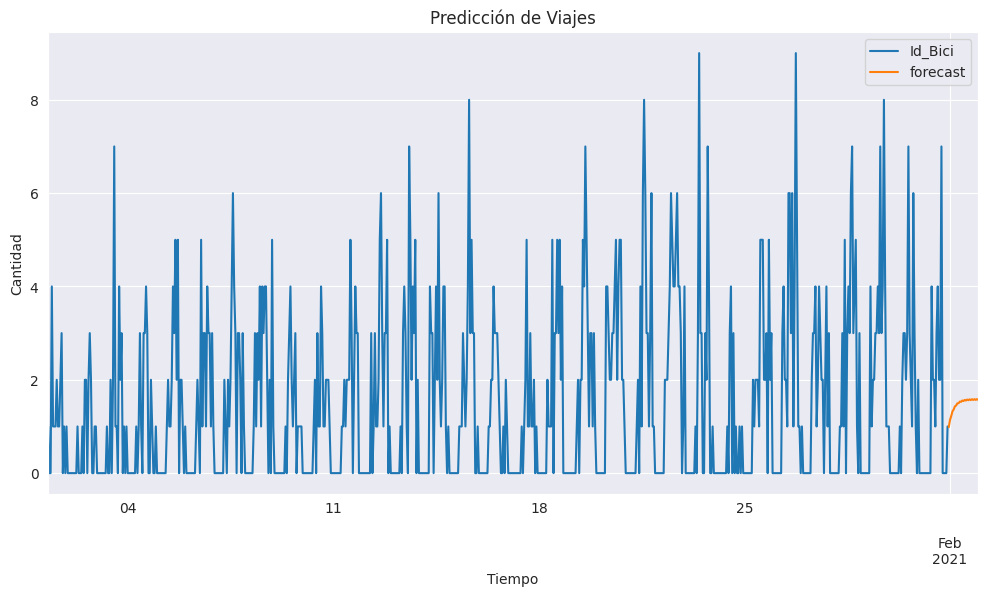

In [ ]:
title = "Predicción de Viajes"
ylabel="Cantidad"
xlabel="Tiempo"

ax = df_resample_ubi_18['Id_Bici'].plot(legend=True, figsize=(12,6), title=title)
forecast_arima_model_ubi_18.plot(legend=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
# definir conjunto de datos
x_ubi_18 = df_mon_to_fri_ubi_18

# instanciar modelo
sarima_model_ubi_18 = SARIMAX(x_ubi_18, order=(2,1,3), seasonal_order=(2, 1, 0, 24))

# ajustar modelo
results_ubi_18 = sarima_model_ubi_18.fit()

# mirar el AIC
results_ubi_18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             Id_Bici   No. Observations:                  497
Model:             SARIMAX(2, 1, 3)x(2, 1, [], 24)   Log Likelihood                -830.271
Date:                             Sun, 23 Jul 2023   AIC                           1676.542
Time:                                     02:36:57   BIC                           1709.798
Sample:                                          0   HQIC                          1689.623
                                             - 497                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6288      0.051     12.320      0.000       0.529       0.729
ar.L2         -0.9369      0.051    -18.274      0.000      -1.037      -0.836
ma.L1         -1.5761      0.063    -25.110      0.000      -1.699      -1.453
ma.L2          1.4823      0.097     15.217      0.000       1.291       1.673
ma.L3         -0.9039      0.065    -13.964      0.000      -1.031      -0.777
ar.S.L24      -0.7092      0.041    -17.304      0.000      -0.789      -0.629
ar.S.L48      -0.3376      0.038     -8.995      0.000      -0.411      -0.264
sigma2         1.8873      0.107     17.659      0.000       1.678       2.097
===================================================================================
Ljung-Box (L1) (Q):                   1.65   Jarque-Bera (JB):                55.98
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                             0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

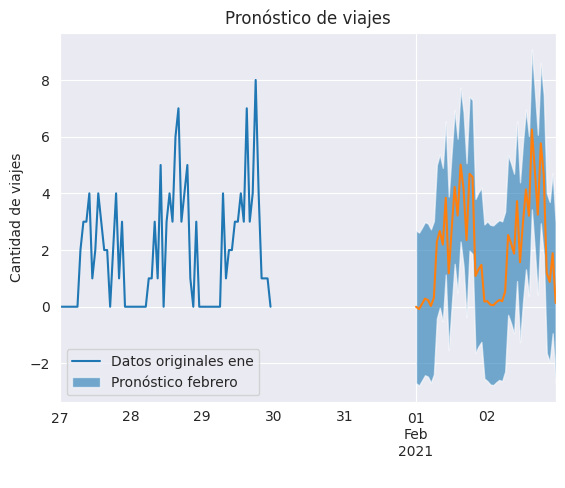

In [ ]:
# tomar de datos originales dias 27-ene, 28-ene, y 29-ene
df_27_29_ubi_18 = df_mon_to_fri_ubi_18.loc['2021-01-27':'2021-01-29']
df_27_29_ubi_18.plot()
# agregar bandas de confianza
pred_1_2_conf_ubi_18 = results_ubi_18.get_forecast(steps=24*2).conf_int()
pred_1_2_conf_ubi_18.index = pd.date_range(start='02/1/2021', end='02/3/2021', freq='H')[:-1]
x_ubi_18 = pd.date_range(start='02/1/2021', end='02/3/2021', freq='H')[:-1]
y1_ubi_18 = pred_1_2_conf_ubi_18['lower Id_Bici']
y2_ubi_18 = pred_1_2_conf_ubi_18['upper Id_Bici']
plt.fill_between(x_ubi_18, y1_ubi_18, y2_ubi_18, alpha=0.6)

# predecir para 1-feb y 2-feb:
pred_1_2_ubi_18 = results_ubi_18.get_forecast(steps=24*2).predicted_mean
pred_1_2_ubi_18.index = pd.date_range(start='02/1/2021', end='02/3/2021', freq='H')[:-1]
pred_1_2_ubi_18.plot()

# formato de la grafica final
plt.title('Pronóstico de viajes')
plt.ylabel('Cantidad de viajes')
plt.xlabel('Semana mie-27-ene al mie-03-feb')
plt.xlabel(' ')
plt.legend(('Datos originales ene', 'Pronóstico febrero'),
           loc='lower left')
#plt.savefig('pronostico.png', dpi=200)
plt.show()

**Pronostico Febrero Ubicación 18**





In [ ]:
df_subconjunto_ubi_18 = viajes_feb[viajes_feb['Ciclo_Estacion_Retiro']==18]

In [ ]:
df_subconjunto_ubi_18.head()

,Genero_Usuario,Edad_Usuario,Bici,Ciclo_Estacion_Retiro,Fecha_Retiro,Hora_Retiro,Ciclo_Estacion_Arribo,Fecha_Arribo,Hora_Arribo,fecha_hora_retiro,fecha_hora
fecha_hora,,,,,,,,,,,
2021-02-01 10:52:01,F,31.0,7925.0,18.0,01/02/2021,10:52:01,238,01/02/2021,11:22:18,01/02/2021 10:52:01,2021-02-01 10:52:01
2021-02-01 08:42:15,M,45.0,7352.0,18.0,01/02/2021,8:42:15,27,01/02/2021,9:18:25,01/02/2021 8:42:15,2021-02-01 08:42:15
2021-02-01 08:49:01,M,26.0,9322.0,18.0,01/02/2021,8:49:01,253,01/02/2021,8:58:54,01/02/2021 8:49:01,2021-02-01 08:49:01
2021-02-01 08:46:55,F,57.0,11557.0,18.0,01/02/2021,8:46:55,119,01/02/2021,8:56:03,01/02/2021 8:46:55,2021-02-01 08:46:55
2021-02-01 05:58:53,F,27.0,9059.0,18.0,01/02/2021,5:58:53,6,01/02/2021,6:23:29,01/02/2021 5:58:53,2021-02-01 05:58:53


In [ ]:
# resample y agregacion por dia de mes
viajes_resample_day_feb_ubi_18 = df_subconjunto_ubi_18.Bici.resample('H').count()

# asignar día de la semana
df_resample_feb_ubi_18 = pd.concat([viajes_resample_day_feb_ubi_18], axis=1)
df_resample_feb_ubi_18['dayofweek'] = df_resample_feb_ubi_18.index.dayofweek # 0 es lunes

# lunes a viernes
df_mon_to_fri_feb_ubi_18 = df_resample_feb_ubi_18[df_resample_feb_ubi_18.dayofweek.isin([0,1,2,3,4])].Bici
df_mon_to_fri_feb_ubi_18.head()

fecha_hora
2021-02-01 05:00:00    1
2021-02-01 06:00:00    0
2021-02-01 07:00:00    1
2021-02-01 08:00:00    3
2021-02-01 09:00:00    0
Name: Bici, dtype: int64

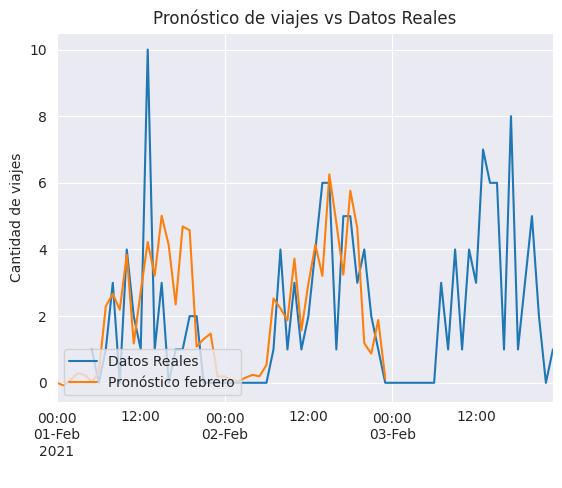

In [ ]:
df_01_03_ubi_18 = df_mon_to_fri_feb_ubi_18.loc['2021-02-01':'2021-02-03']
df_01_03_ubi_18.plot()

pred_1_2_ubi_18.plot()
# formato de la grafica final
plt.title('Pronóstico de viajes vs Datos Reales')
plt.ylabel('Cantidad de viajes')
plt.xlabel('Semana del 01 al mie-03-feb')
plt.xlabel(' ')
plt.legend(('Datos Reales','Pronóstico febrero'),
           loc='lower left')

plt.show()